In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pipeline import Pipeline
import plot
import numpy as np
from matplotlib import pyplot as plt

show = plt.imshow

In [3]:
noise = np.random.randint(0, 256, size=(100, 100, 3))

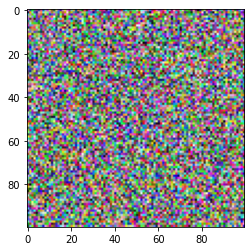

In [4]:
plt.imshow(noise)

In [5]:
pipe = Pipeline()
parameter = pipe.get_parameter()

In [6]:
parameter

{'hist_orientations': 8,
 'gauß_depth': 5,
 'phog_depth': 3,
 'resize_factor': False}

In [7]:
result = pipe.run(noise)

INFO:root:Execute run ...
INFO:root:Picture shape: (100, 100, 3)
INFO:root:Execute calculate_sigmas ...
INFO:root:sigmas = 1.58, 5.00, 15.81, 50.00
INFO:root:working_sigmas = 1.58, 4.74, 15.08, 47.67
INFO:root:calculate_sigmas     executed in       0:00:00.001488
INFO:root:Execute convert2lab ...
INFO:root:convert2lab          executed in       0:00:00.001489
INFO:root:Execute create_scalespaces ...
INFO:root:create_scalespaces   executed in       0:00:00.972655
INFO:root:Execute create_differences ...
INFO:root:create_differences   executed in       0:00:00.000496
INFO:root:Execute create_feature_vector_mp ...
INFO:root:create_feature_vector_mp executed in       0:00:01.080284
INFO:root:run                  executed in       0:00:02.064847


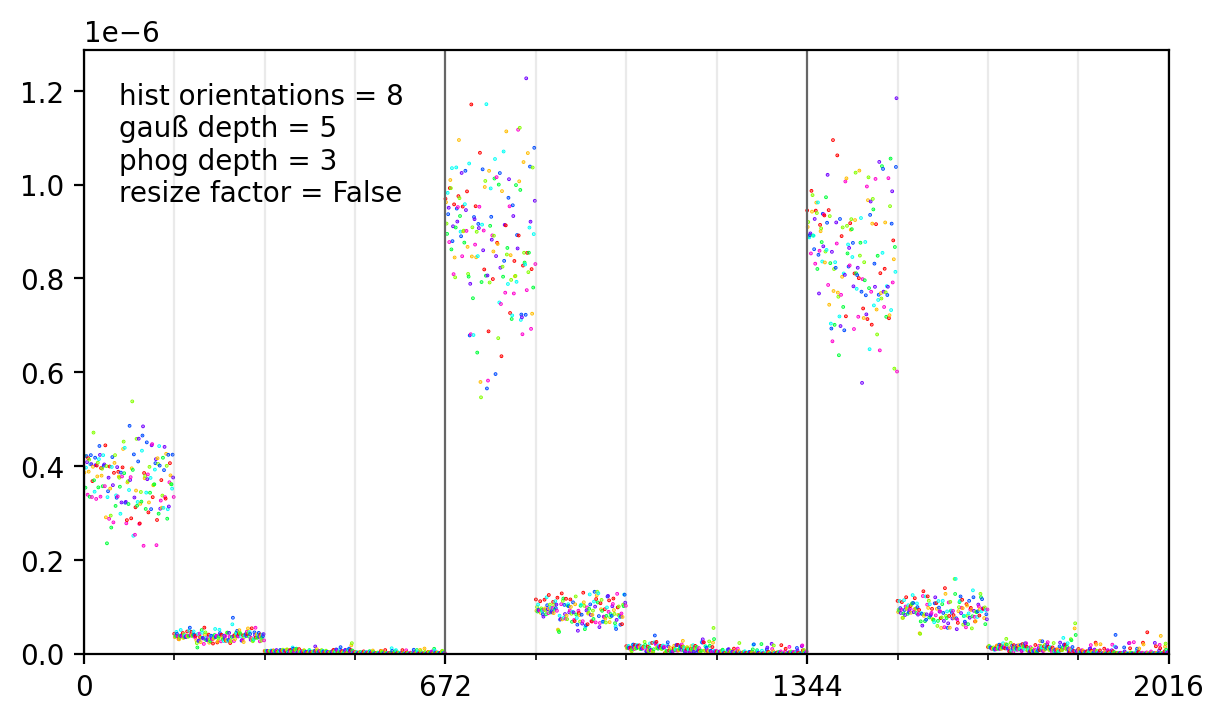

In [20]:
plot.vector(result[-1], parameter=parameter, colors=True)

In [11]:
np.linspace(0, 255, 127, dtype=int)

array([  0,   2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24,
        26,  28,  30,  32,  34,  36,  38,  40,  42,  44,  46,  48,  50,
        52,  54,  56,  58,  60,  62,  64,  66,  68,  70,  72,  74,  76,
        78,  80,  82,  85,  87,  89,  91,  93,  95,  97,  99, 101, 103,
       105, 107, 109, 111, 113, 115, 117, 119, 121, 123, 125, 127, 129,
       131, 133, 135, 137, 139, 141, 143, 145, 147, 149, 151, 153, 155,
       157, 159, 161, 163, 165, 167, 170, 172, 174, 176, 178, 180, 182,
       184, 186, 188, 190, 192, 194, 196, 198, 200, 202, 204, 206, 208,
       210, 212, 214, 216, 218, 220, 222, 224, 226, 228, 230, 232, 234,
       236, 238, 240, 242, 244, 246, 248, 250, 252, 255])

In [12]:
verlauf = np.ones(shape=(255, 255, 3), dtype=int) * np.arange(0, 255, dtype=int).reshape(255, 1)

In [13]:
np.array([1, 2]).reshape(2, 1)

array([[1],
       [2]])

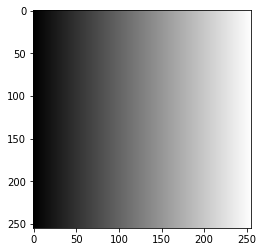

In [14]:
plt.imshow(verlauf)

In [15]:
result2 = pipe.run(verlauf)

INFO:root:Execute run ...
INFO:root:Picture shape: (255, 255, 3)
INFO:root:Execute calculate_sigmas ...
INFO:root:sigmas = 4.03, 12.75, 40.32, 127.50
INFO:root:working_sigmas = 4.03, 12.10, 38.46, 121.56
INFO:root:calculate_sigmas     executed in       0:00:00.001488
INFO:root:Execute convert2lab ...
INFO:root:convert2lab          executed in       0:00:00.015871
INFO:root:Execute create_scalespaces ...
INFO:root:create_scalespaces   executed in       0:00:01.094672
INFO:root:Execute create_differences ...
INFO:root:create_differences   executed in       0:00:00.003968
INFO:root:Execute create_feature_vector_mp ...
INFO:root:create_feature_vector_mp executed in       0:00:01.030684
INFO:root:run                  executed in       0:00:02.155616


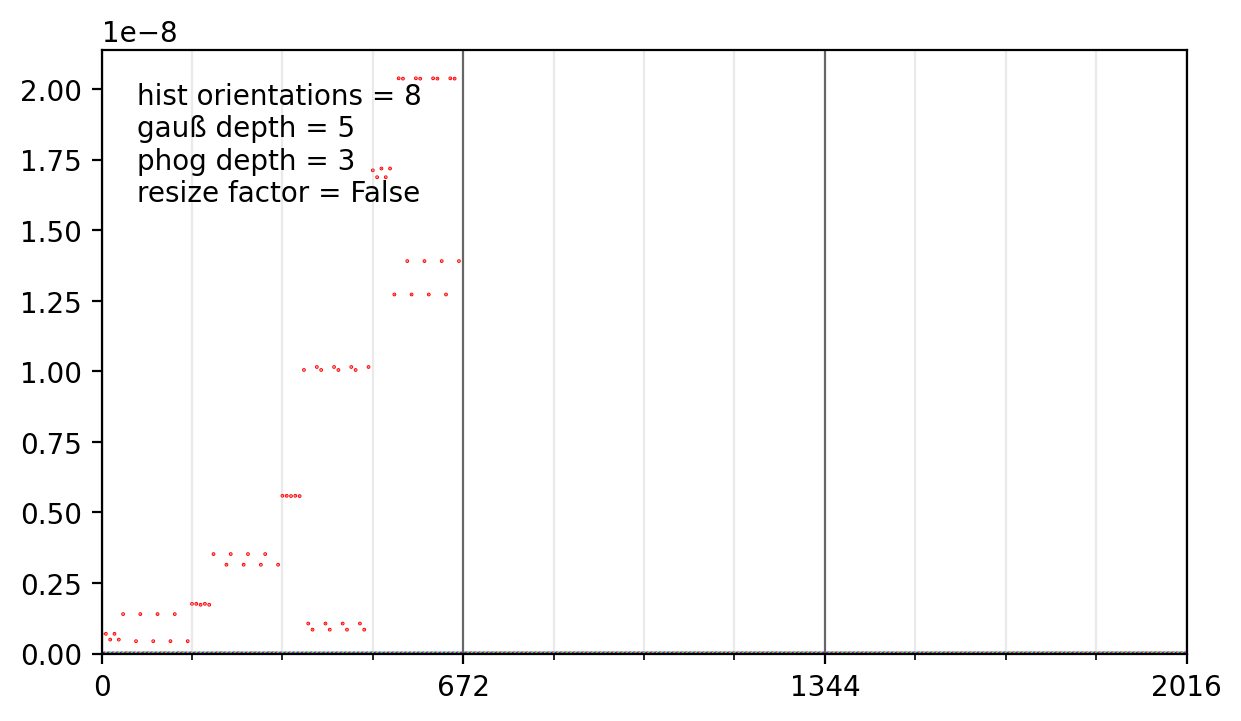

In [49]:
plot.vector(result2[-1], parameter=parameter, colors=True, channel=None)

In [ ]:
plot.plot_vector(result2[-1], **pipe.get_parameter())

In [ ]:
pipe.get_parameter()

In [24]:
l = [1, 2, 3] * 5

In [37]:
[np.array(l)[i::3] for i in range(3)]

[array([1, 1, 1, 1, 1]), array([2, 2, 2, 2, 2]), array([3, 3, 3, 3, 3])]

In [33]:
[i for i in l if i%3==0]

[3, 3, 3, 3, 3]

In [40]:
e = enumerate(['a', 'b', 'c'])

In [41]:
next(e)

(0, 'a')

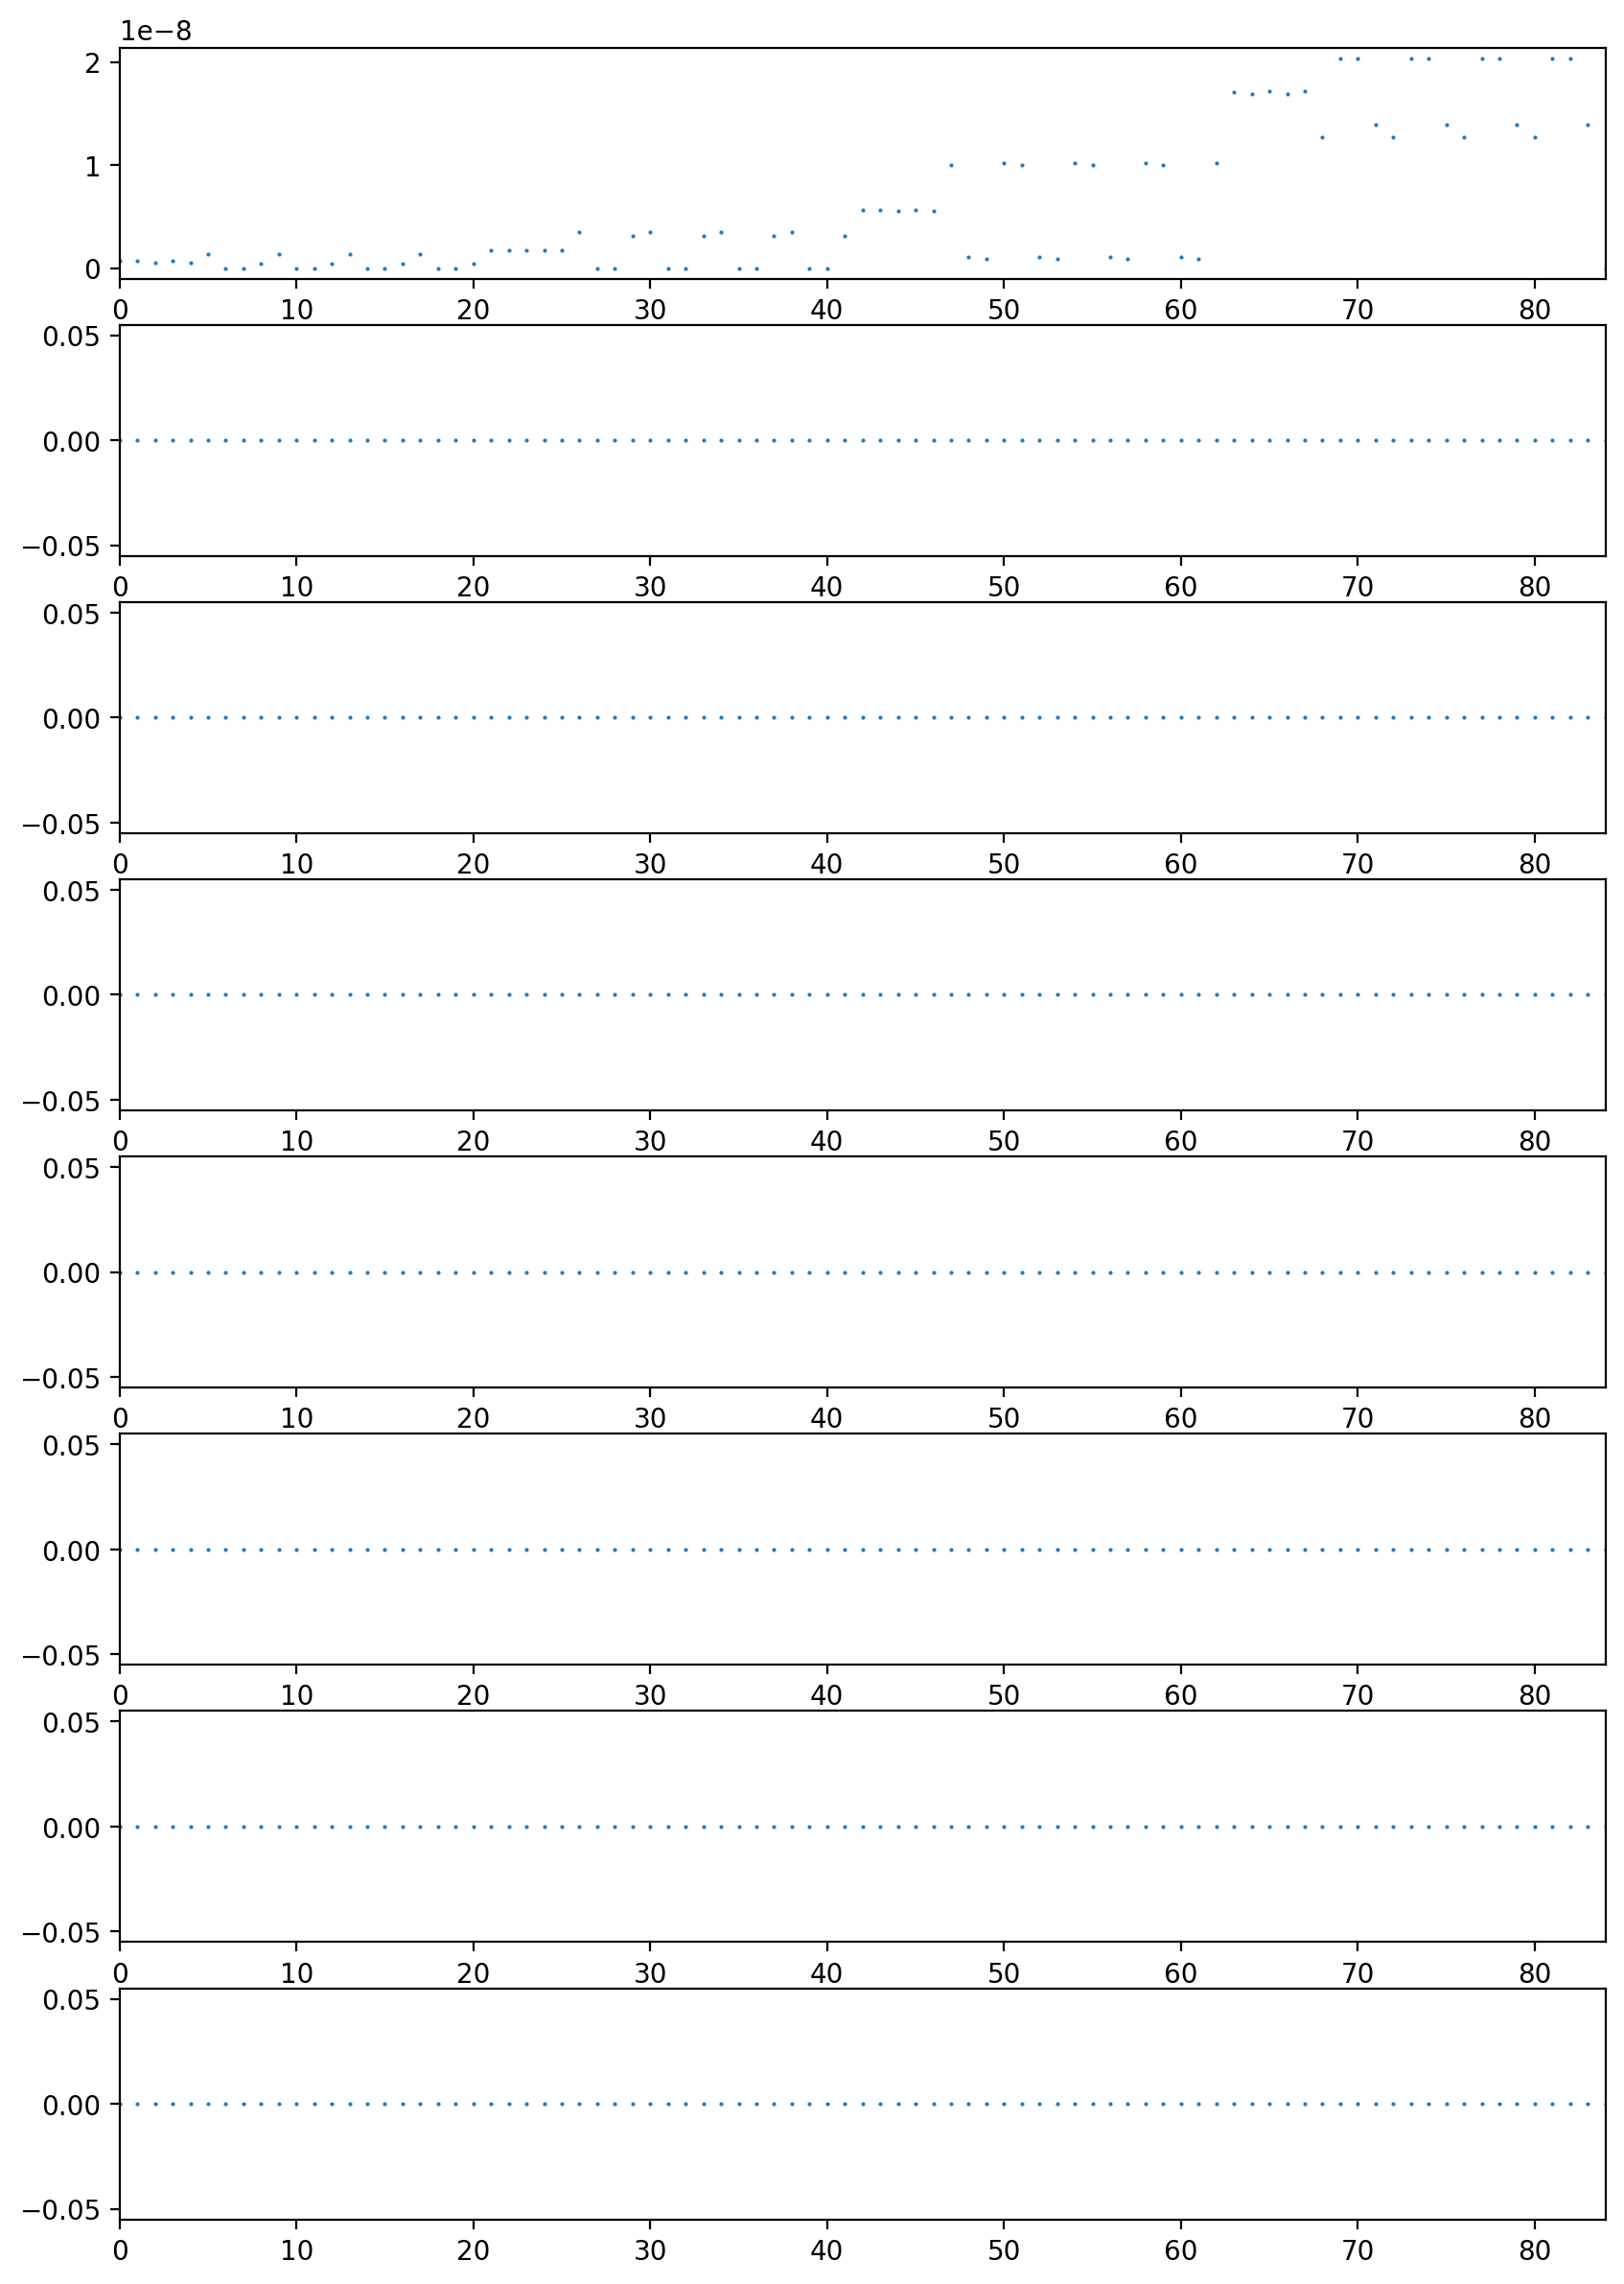

In [51]:
plot.orientations(result2[-1], parameter, channel='L')

## Plotting Lab

In [1]:
import pylab as pl
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt

import plot


#from matplotlib.backends.backend_pgf import FigureCanvasPgf
#mpl.backend_bases.register_backend('pdf', FigureCanvasPgf)


mpl.use("pgf")
mpl.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

In [10]:
fig, (ax_l, ax_a, ax_b) = plt.subplots(3, 1, dpi=200, constrained_layout=True)

fig.set_size_inches(w=2.5, h=2.5)

mpl.colorbar.ColorbarBase(ax_l, orientation='horizontal', cmap=mpl.cm.get_cmap('Greys_r'),
                         norm=mpl.colors.Normalize(0, 100), ticks=[0, 50, 100],)
mpl.colorbar.ColorbarBase(ax_a, orientation='horizontal', cmap=plot.redgreen,
                         norm=mpl.colors.Normalize(-128, 127), ticks=[-128, 0, 127],
                        )
mpl.colorbar.ColorbarBase(ax_b, orientation='horizontal', cmap=plot.yellowblue,
                         norm=mpl.colors.Normalize(-128, 127), ticks=[-128, 0, 127])
#ax_l.set_title('L', loc='left')
#ax_a.set_title('a', loc='left')
#ax_b.set_title('b', loc='left')
ax_l.set_title('L')
ax_a.set_title('a')
ax_b.set_title('b')

#plt.show()

Text(0.5, 1.0, 'b')

In [11]:
plt.savefig('lab_bars.pgf')

In [4]:
import tikzplotlib

In [5]:
tikzplotlib.save("test.tex")